In [1]:
from fastai.vision.all import *

/home/ubuntu/miniconda3/envs/fastai/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = Path("/home/ubuntu/data/mvtec/")

In [3]:
images = [file for file in get_image_files(path) if "ground_truth" not in str(file)]

In [4]:
def label_fn(file):
    return file.parents[2].name

In [15]:
dls = ImageDataLoaders.from_path_func(path, images, label_fn, item_tfms=Resize(384), bs=8)

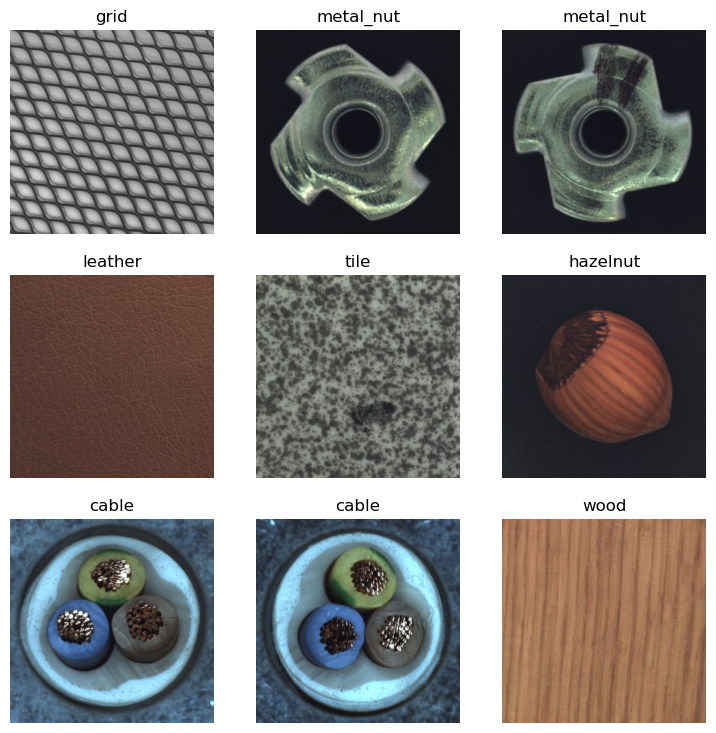

In [6]:
dls.show_batch()

In [16]:
learner = cnn_learner(dls, resnet152, metrics=accuracy)

In [17]:
learner.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time


OutOfMemoryError: CUDA out of memory. Tried to allocate 72.00 MiB (GPU 0; 15.78 GiB total capacity; 14.60 GiB already allocated; 14.94 MiB free; 14.65 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF